# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

%pip install iso3166

### Import Statements

In [216]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
from dateutil import parser




### Notebook Presentation

In [217]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [218]:
df_data = pd.read_csv("mission_launches.csv")

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [219]:
print(f"The dataframe has {df_data.shape[0]} rows and {df_data.shape[1]} columns")

The dataframe has 4324 rows and 9 columns


In [220]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


<p>Above we see the column names, it appears that unamed:0.1 and unamed:0 are columns with the row number.</p>

## Checking for duplicates and NaN values ##

In [221]:
#checking for NaN values
print(f"When checking for NAN the result returns {df_data.isna().values.any()}")

When checking for NAN the result returns True


In [222]:
print(f"There are {df_data.isna().values.sum()} missing values in the dataframe.")

There are 3360 missing values in the dataframe.


In [223]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [224]:
#checking for duplicate values
print(f"When checking for NAN the result returns {df_data.duplicated().values.any()}")


When checking for NAN the result returns False


In [225]:
#dropping the Nan values and using a separate Dataframe in case cost comparisons need to be made.
df_data_clean = df_data.dropna()
df_data_clean.isna().values.any()

False

In [226]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


# Number of Launches per Company

Creating a chart that shows the number of space mission launches by organisation.

In [227]:
launches_by_org = df_data.Organisation.value_counts()

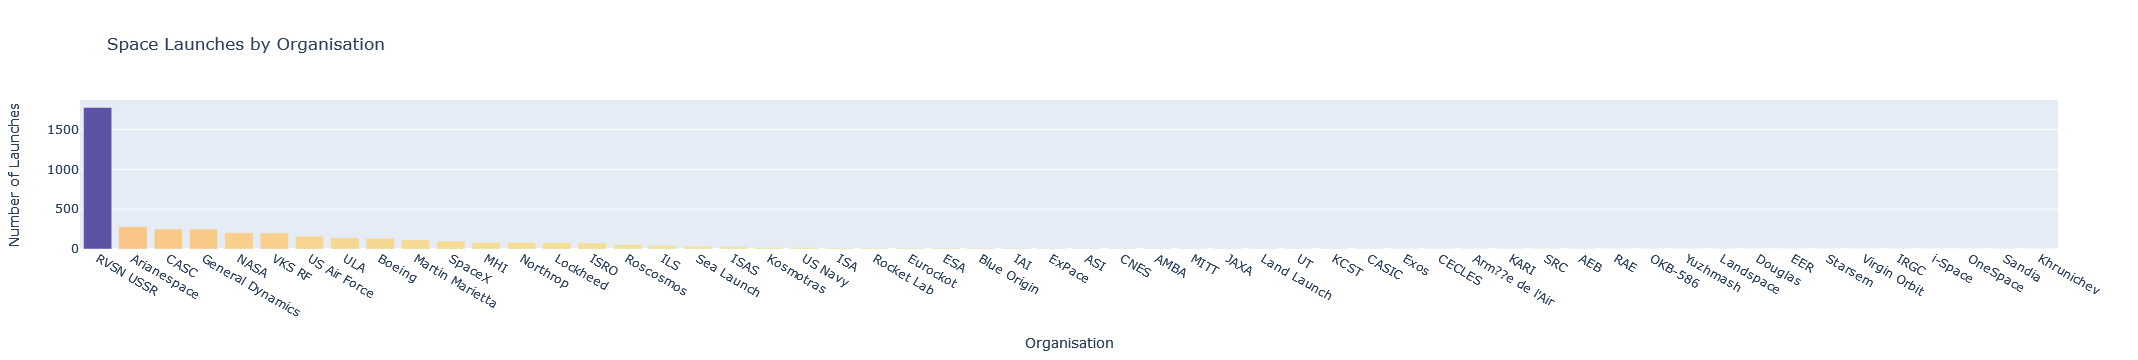

In [228]:
launches = px.bar(launches_by_org, 
                  x = launches_by_org.index, 
                  y = launches_by_org.values,
                  title = 'Space Launches by Organisation',
                 color = launches_by_org.values,
                 color_continuous_scale = 'sunset')

launches.update_layout(yaxis_title = "Number of Launches", coloraxis_showscale = False)

launches.show()

<p> The former Soviet Union was responsible for the most amount of rocket launches.</p>

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [229]:
status = df_data.Rocket_Status.value_counts()

In [230]:
# We will do a bar char to visualize this, but first let's provide a list of values for the x axis (x = ["Yes", "No"]) instead of using the index

rocket_status = px.bar(
    status,
    x=['Active', 'Retired'],
    y = status.values,
    color = status.values
)
rocket_status.update_layout(title = 'Active vs Decommissioned Rockets', yaxis_title = "Number of Rockets", coloraxis_showscale = False, yaxis_range =[0,4000])

rocket_status.show()
    

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [231]:
df_data.Mission_Status.value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

<p>Here we see 3879 missions were successful, and 445 experience failure of some type.</p>

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [232]:
# the histogram will be sorted by price in ascending order

price_hist = px.histogram(df_data_clean, x='Price', histnorm = 'percent', nbins = 30, opacity = 0.9, title ="Space Mission Cost Histogram").update_xaxes(categoryorder='total ascending')

price_hist.update_layout(xaxis_title = "Cost of Mission in $ Millions")


<p>From the analysis, the majority of space launches are 450+ million at 14.0%. This price also marks the highest cost for space missions.</p>

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

<p>Russia, Barents Sea, Sharud, Pacific Missile Range, North Korea, Gran Canaria need to be converted. </p>

<h3>Changing some locations to country names.</h3>

In [233]:
# Use manual mapping

location_dict = {
    'Yellow Sea' :'China',
    'Barents Sea' : 'Russian Federation',
    'Shahrud Missile Test Site' :'Iran, Islamic Republic of',
    'North Korea': 'Korea, Democratic People\'s Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Gran Canaria' :'USA',
    'Russia': 'Russian Federation'
}

<h3>Converting string to ISO</h3>

In [234]:
# Can be done by splitting the each location by comma and getting that data. 
#For example let's use JAPAN
print(df_data.Location[200])
country_name = df_data.Location[200].split(",")[-1].strip()   #.strip to remove any extra whitespaces
print(country_name)
print(countries.get(country_name).alpha3)   # alpha three returns 3 letter iso

LA-Y1, Tanegashima Space Center, Japan
Japan
JPN


In [235]:
#Putting this into a function

def get_iso(location):
    try:

        # loop through each dict key/value
        for key, country in location_dict.items():
            #if key is present anywhere in location string
            if key in location:
                #access the value of the key and get the 3 letter ISO code
                return countries.get(country).alpha3
                
         # if manual mapping doesn't work...       
        country_name = location.split(",")[-1].strip()
        return countries.get(country_name).alpha3

    except KeyError:
        return None
df_data['ISO'] = df_data['Location'].apply(get_iso)

In [236]:
# making a new dataframe with the counts
launches_by_country = df_data.ISO.value_counts().reset_index()

launches_by_country

,ISO,count
0,RUS,1398
1,USA,1347
2,KAZ,701
3,FRA,303
4,CHN,269
5,JPN,126
6,IND,76
7,NZL,13
8,ISR,11
9,KEN,9


In [237]:
map = px.choropleth(launches_by_country, 
                    locations = 'ISO', 
                    color = 'ISO',
                    color_continuous_scale = 'solar',
                   hover_name ='ISO',
                   hover_data ={'count':True})
map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [238]:
# first we need to group all failure types together: this code handles it by creating a new dataframe to include only failures
# df_data.loc[df_data['Mission_Status'] != 'Success']

# then we can groupby
failures = df_data.loc[df_data['Mission_Status'] != 'Success'].groupby(['ISO'], as_index = False).agg({'Mission_Status':pd.Series.count})


In [239]:
# renaming the columns
failures.rename(columns={'Mission_Status':'Failures'}, inplace= True)


In [240]:
map = px.choropleth(failures, 
                    locations = 'ISO', 
                    color = 'ISO',
                    color_continuous_scale = 'solar',
                   hover_name ='ISO',
                   hover_data ={'Failures':True})
map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [241]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [242]:
# Creating a dataframe that groups by country, org, and mission status, then count occurences of each combination.
iso_status = df_data.groupby(['ISO', 'Organisation', 'Mission_Status']).size().reset_index(name='counts')
iso_status

,ISO,Organisation,Mission_Status,counts
0,AUS,AMBA,Success,1
1,AUS,CECLES,Failure,2
2,AUS,CECLES,Success,1
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1
...,...,...,...,...
118,USA,US Air Force,Success,129
119,USA,US Navy,Failure,14
120,USA,US Navy,Partial Failure,1
121,USA,US Navy,Success,2


In [243]:
# Define a custom color mapping for different Mission_Status values

color_mapping = {
    'Success' :'green',
    'Partial Failure' :'Yellow',
    'Failure': 'red',
}


sunburst = px.sunburst(iso_status,
                       path=['ISO', 'Organisation', 'Mission_Status'],  # define hierarchy
                       values = 'counts',
                       color = 'Mission_Status',
                       color_discrete_map = color_mapping,
                       title= 'Sunburst Launch Chart by Country, Organisation, and Mission Result')
sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [244]:
# we'll use the clean df with the no cost values dropped for a accurate analysis
# however, we'll need to convert the dtype to an int64 in order to sum up price

In [245]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


<h2> The Price must be converted to a int or float</h2>

In [246]:
# first we'll remove all the commas then convert to float
df_data_clean['Price'] = df_data_clean['Price'].str.replace(',','').astype(float)




C:\Users\burge\AppData\Local\Temp\ipykernel_58768\684746358.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [247]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    964 non-null    int64  
 1   Unnamed: 0      964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    float64
 8   Mission_Status  964 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 75.3+ KB


In [248]:
money_spent_per_org = df_data_clean.groupby(['Organisation'], as_index = False).agg({'Price': pd.Series.sum})
money_spent_per_org

,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00
5,Eurockot,543.40
6,ExPace,28.30
7,ILS,"1,320.00"
8,ISRO,"2,177.00"
9,JAXA,168.00


In [249]:
money_bar = px.bar(
    money_spent_per_org,
    x='Organisation',
    y='Price',
    color = 'Price',
    color_continuous_scale = 'sunset',
    title='Money spent per organisation'
)

money_bar.update_layout(yaxis_title = 'Price in $ Millions',
                       coloraxis_showscale = False)

# change to y axis to log scale
money_bar.update_yaxes(type = 'log')


# Analyse the Amount of Money Spent by Organisation per Launch

In [250]:
# here we will average the prices to determine a per launch value
org_avg_spend = df_data_clean.groupby(['Organisation'], as_index = False).agg({'Price': pd.Series.mean})

In [251]:
money_bar = px.bar(
    org_avg_spend,
    x='Organisation',
    y='Price',
    color = 'Price',
    color_continuous_scale = 'sunset',
    title='Average Cost per Launch'
)

money_bar.update_layout(yaxis_title = 'Price in $ Millions',
                       coloraxis_showscale = False)

# change to y axis to log scale
money_bar.update_yaxes(type = 'log')

# Chart the Number of Launches per Year

In [252]:
df_data.Date[105]

'Fri Aug 30, 2019 14:00 UTC'

In [253]:
pd.to_datetime(df_data.Date[105], format = "%a %b %d, %Y %H:%M %Z")

Timestamp('2019-08-30 14:00:00+0000', tz='UTC')

In [254]:
df_data.Date[106]

'Thu Aug 29, 2019'

In [255]:
pd.to_datetime(df_data.Date[106], format = "%a %b %d, %Y")

Timestamp('2019-08-29 00:00:00')

<p>As shown above, we have two different formats shown across the rows, some dates have a time, while some don't. Passing this through the to_datime method will usually throw an error since the formats are not consistent.</p>

In [256]:
# making a function to handle different formats. We will convert all times to UTC

def date_process (x):
    only_date_format = "%a %b %d, %Y"
    
    try:
        return pd.to_datetime(x, utc = True)

    # For values with date-only, we will handle this exception.
    except ValueError:
        return pd.to_datetime(x, format = only_date_format, utc = True)


In [257]:
df_data['Date'] = df_data['Date'].apply(date_process)

<h3>Repeating process for clean DF</h3>

In [258]:
df_data_clean['Date'] = df_data_clean['Date'].apply(date_process)

C:\Users\burge\AppData\Local\Temp\ipykernel_58768\3167279769.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<h3>Checking our work</h3>

In [259]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    4324 non-null   int64              
 1   Unnamed: 0      4324 non-null   int64              
 2   Organisation    4324 non-null   object             
 3   Location        4324 non-null   object             
 4   Date            4324 non-null   datetime64[ns, UTC]
 5   Detail          4324 non-null   object             
 6   Rocket_Status   4324 non-null   object             
 7   Price           964 non-null    object             
 8   Mission_Status  4324 non-null   object             
 9   ISO             4268 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 337.9+ KB


In [260]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    964 non-null    int64              
 1   Unnamed: 0      964 non-null    int64              
 2   Organisation    964 non-null    object             
 3   Location        964 non-null    object             
 4   Date            964 non-null    datetime64[ns, UTC]
 5   Detail          964 non-null    object             
 6   Rocket_Status   964 non-null    object             
 7   Price           964 non-null    float64            
 8   Mission_Status  964 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 75.3+ KB


<h3>Adding columns for year and months</h3>

In [261]:
# this will be done by adding a column with the year of launch

# first creating a datetime index from the release date column
dates = pd.DatetimeIndex(data=df_data.Date)
years = dates.year
months = dates.month


df_data.insert(5, 'Year', years)
df_data.insert(6, 'Month', months)

In [262]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Year,Month,Detail,Rocket_Status,Price,Mission_Status,ISO
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,2020,8,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,2020,8,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,2020,8,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,2020,7,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,2020,7,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


<h2>Finally, we can start plotting our graph.</h2>

In [263]:
# let's group the launches by year first
launches_per_year = df_data.Year.value_counts()



In [264]:
year_launches = px.bar(launches_per_year,
                       x=launches_per_year.index,
                       y = launches_per_year.values,
                       color = launches_per_year.values,
                       color_continuous_scale = 'dense'
                      )
year_launches.update_layout(title = 'Launches per Year', yaxis_title = 'Number of Launches', xaxis_title = 'Year')

year_launches.show()
                       
                       
                       


<p>2018 has the most launches since 1957</p>

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [265]:
launches_ordered = df_data.sort_values(by='Date')
# group by year and month, use size to get number of elements and reset index
launch_counts = launches_ordered.groupby(['Year','Month']).size().reset_index(name = 'Launches')
launch_counts

,Year,Month,Launches
0,1957,10,1
1,1957,11,1
2,1957,12,1
3,1958,2,2
4,1958,3,3
...,...,...,...
742,2020,4,5
743,2020,5,9
744,2020,6,7
745,2020,7,14


In [266]:
# Create a new datetime column to represent Year-Month for plotting
launch_counts['Date'] = pd.to_datetime(launch_counts['Year'].astype(str) + '-' + launch_counts['Month'].astype(str))
launch_counts

,Year,Month,Launches,Date
0,1957,10,1,1957-10-01
1,1957,11,1,1957-11-01
2,1957,12,1,1957-12-01
3,1958,2,2,1958-02-01
4,1958,3,3,1958-03-01
...,...,...,...,...
742,2020,4,5,2020-04-01
743,2020,5,9,2020-05-01
744,2020,6,7,2020-06-01
745,2020,7,14,2020-07-01


<h4>Specifying a moving avg</h4>

In [295]:
# we'll take 6 observations and average them
launch_counts['Roll_avg_launches']= launch_counts.Launches.rolling(window = 6).mean()
launch_counts

,Year,Month,Launches,Date,Roll_avg_launches
0,1957,10,1,1957-10-01,NaN
1,1957,11,1,1957-11-01,NaN
2,1957,12,1,1957-12-01,NaN
3,1958,2,2,1958-02-01,NaN
4,1958,3,3,1958-03-01,NaN
...,...,...,...,...,...
742,2020,4,5,2020-04-01,9.67
743,2020,5,9,2020-05-01,9.17
744,2020,6,7,2020-06-01,7.67
745,2020,7,14,2020-07-01,8.67


C:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



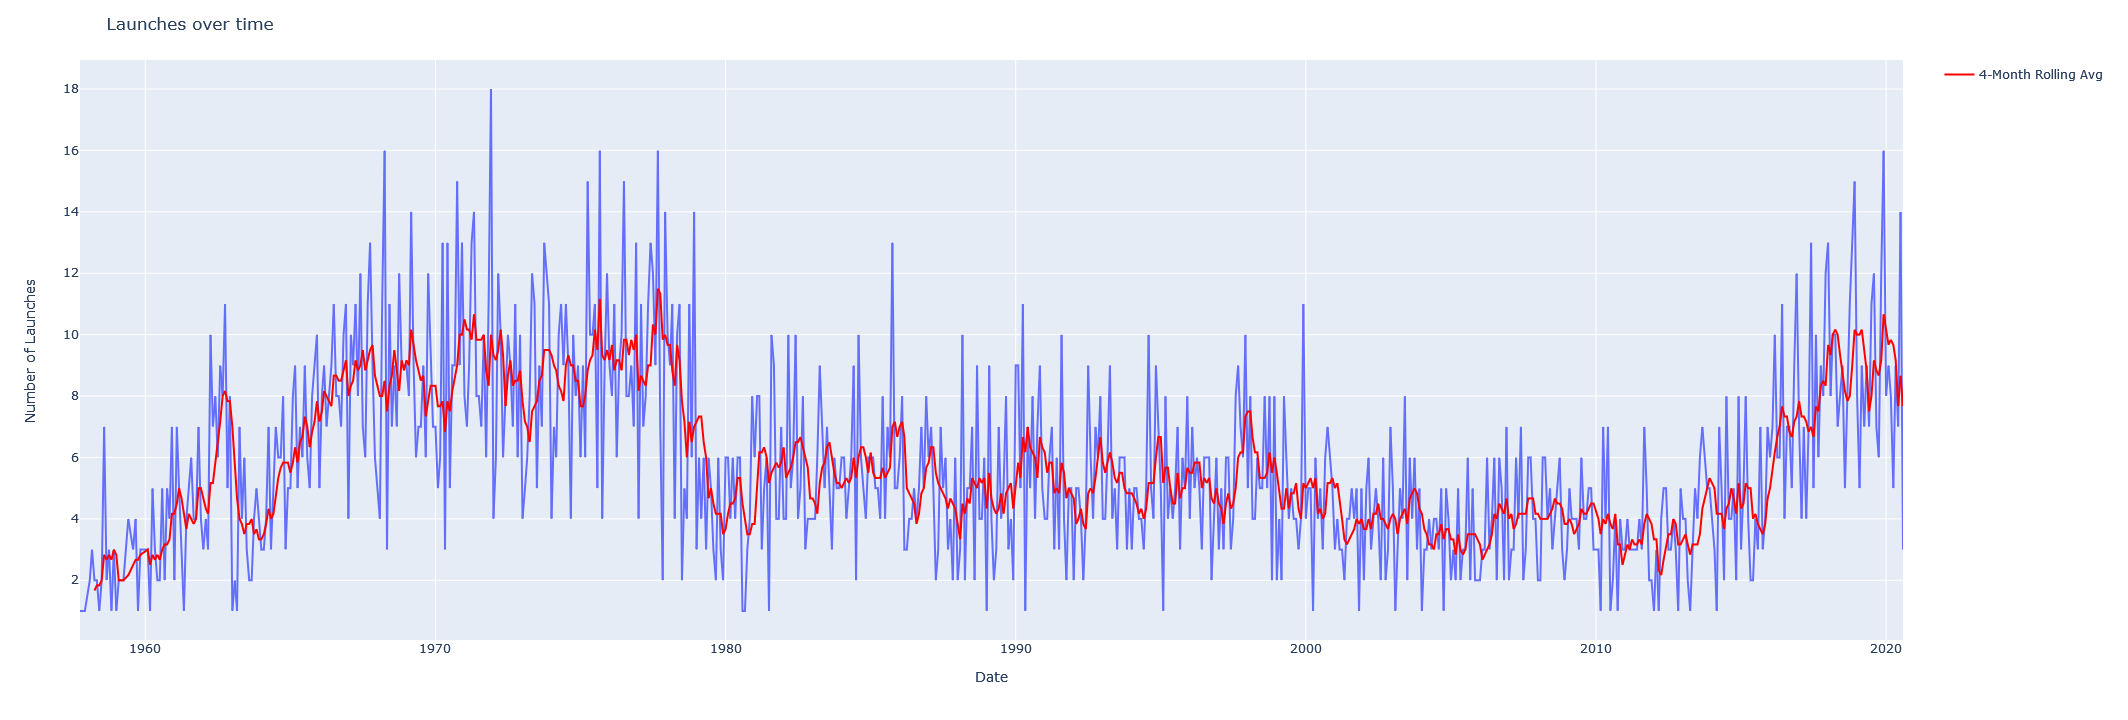

In [296]:
year_launches = px.line(launch_counts,
                       x='Date',
                       y = 'Launches',
                        width = 1500, height = 720
                       
                      )
year_launches.update_layout(title = 'Launches over time', yaxis_title = 'Number of Launches', xaxis_title = 'Date')

year_launches.add_scatter(x=launch_counts.Date, y=launch_counts.Roll_avg_launches, mode='lines', name='4-Month Rolling Avg', line=dict(color='red'))


year_launches.show()
                       

<h4>As we can see, December of 1971 was the most popular month of all time for space launches.</h4>

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [269]:
month_popularity = df_data.Month.value_counts()
month_popularity

Month
12    450
6     402
4     383
10    381
8     373
9     365
3     353
7     351
2     336
11    336
5     326
1     268
Name: count, dtype: int64

In [270]:
month_bar = px.bar(month_popularity,
                   x=month_popularity.index,
                   y=month_popularity.values,
                   color = month_popularity.values,
                   color_continuous_scale='agsunset',
                   title = 'Total launches per Month'
                  )
month_bar.update_layout(xaxis_title = 'Month', yaxis_title ='Number of Launches during Month')

month_bar.show()

<p>Based on the chart, December is the most popular month for space launches.</p>

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [271]:
#First sort the data by date, and use the clean_df which has no cost missions removed.
sorted_price = df_data_clean.sort_values('Date')


In [272]:
cost_line = px.scatter(sorted_price,
                    x='Date',
                    y='Price',
                    title = 'Cost of Space Missions over Time',
                    color = 'Price',
                    color_continuous_scale = 'mygbm',
                    
)

cost_line.update_layout (xaxis_title = 'Date',
                         yaxis_title = 'Cost in $ Millions',
                        template = 'ggplot2',
                        xaxis_range = ['1963-01-01', '2021-12-31'],  # Set x-axis limits]
)

# change to y axis to log scale
cost_line.update_yaxes(type = 'log')

cost_line.show()


                    

C:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<p>From the scatter plot. The range in prices has increased. Within the past 15 years, cheap space flights have increased in popularity ($<60 million)</p>

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [297]:
# find top 10 organisation by launch count
top_10_orgs = df_data['Organisation'].value_counts().nlargest(10).index

# filter dataframe for only top 10 organisations here is pass in the index we made earlier into the isin method   df_data['Organisation'].isin(top_10_orgs) returns a boolean series, where True means the data is in the index defined earlier. 
# lastly it is encolosed by df_data so only rows marked as true are shown in the dataframe
filtered_df = df_data[df_data['Organisation'].isin(top_10_orgs)]


# group data by date let's aggregate all the launches per year

launches_sorted = filtered_df.groupby([filtered_df['Date'].dt.year, 'Organisation']).size().reset_index(name= 'Launches')
launches_sorted


,Date,Organisation,Launches
0,1957,RVSN USSR,2
1,1958,NASA,2
2,1958,RVSN USSR,5
3,1958,US Air Force,2
4,1959,General Dynamics,1
...,...,...,...
318,2019,VKS RF,8
319,2020,Arianespace,4
320,2020,CASC,19
321,2020,ULA,4


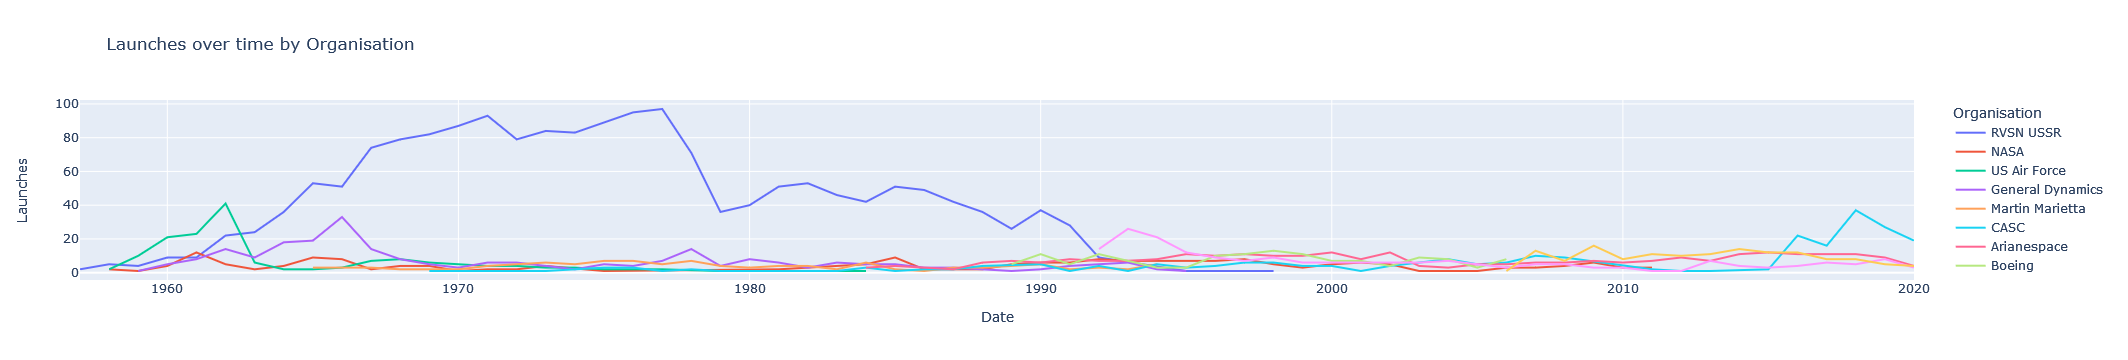

In [299]:

# plot

fig = px.line(launches_sorted,
              x = 'Date',
              y='Launches',
              color = 'Organisation',
              title = 'Launches over time by Organisation')
fig.show()

<p>The USSR led in space launches from 1963 to 1992 (collapse of Soviet Union). Space launches between organisations have been largely equal, until 2016 where the CASC began to take the lead.</p>

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [300]:
# first filter the df to only include years before 1991
years_sorted = df_data[df_data['Year'] < 1991 ].sort_values(by='Date')
years_sorted

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Year,Month,Detail,Rocket_Status,Price,Mission_Status,ISO
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,1957,10,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,KAZ
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,1957,11,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,1957,12,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,1958,2,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,1958,2,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
1780,1780,1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01 15:57:00+00:00,1990,12,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,USA
1779,1779,1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,1990,12,Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,USA
1778,1778,1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1990-12-04 00:48:00+00:00,1990,12,Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,KAZ
1777,1777,1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1990-12-10 07:54:00+00:00,1990,12,Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,RUS


In [302]:
# replace KAZ with RUS to trat KAZ as part of Russia
years_sorted['ISO'] = years_sorted['ISO'].replace({'KAZ': 'RUS'})

# since Kaz was part of the Soviet union, when sorting by ISO, Kaz will be considered as part of the USSR
USSR_US = ['USA', 'RUS']

#filter out df by these two countries
years_sorted = years_sorted.loc[years_sorted['ISO'].isin(USSR_US)]


C:\Users\burge\AppData\Local\Temp\ipykernel_58768\2727166295.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [303]:

years_sorted = years_sorted.groupby(['Year', 'ISO']).size().reset_index(name= 'Launches')



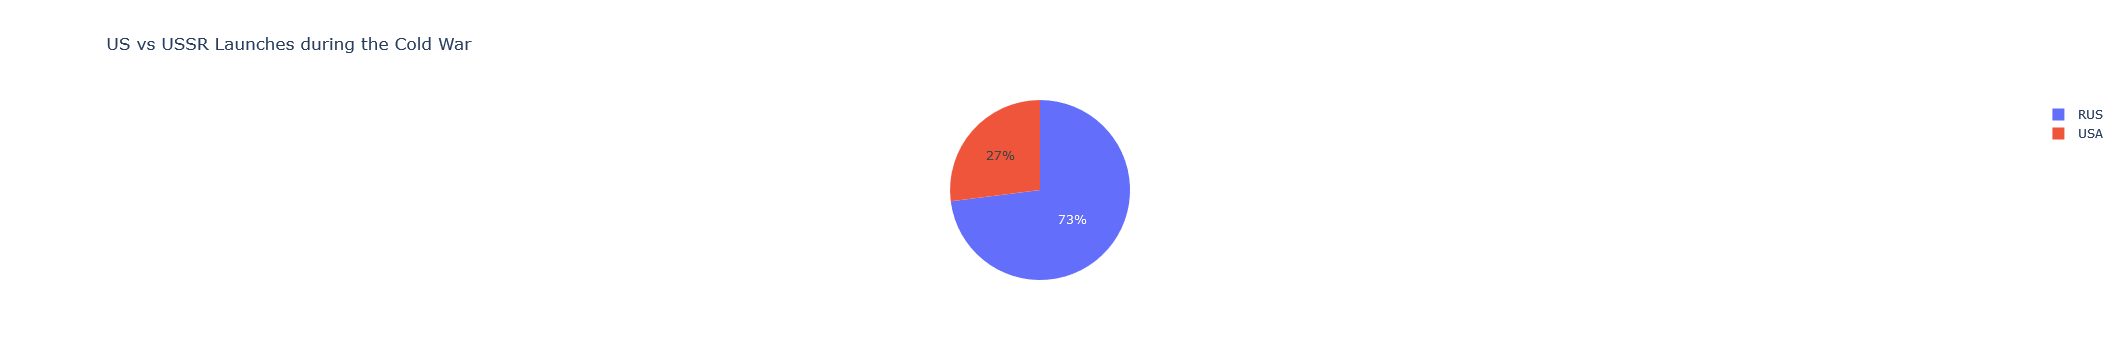

In [304]:
us_soviet_pie = px.pie(years_sorted,
                       values = 'Launches',
                       names = 'ISO',
                       title = 'US vs USSR Launches during the Cold War')
us_soviet_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

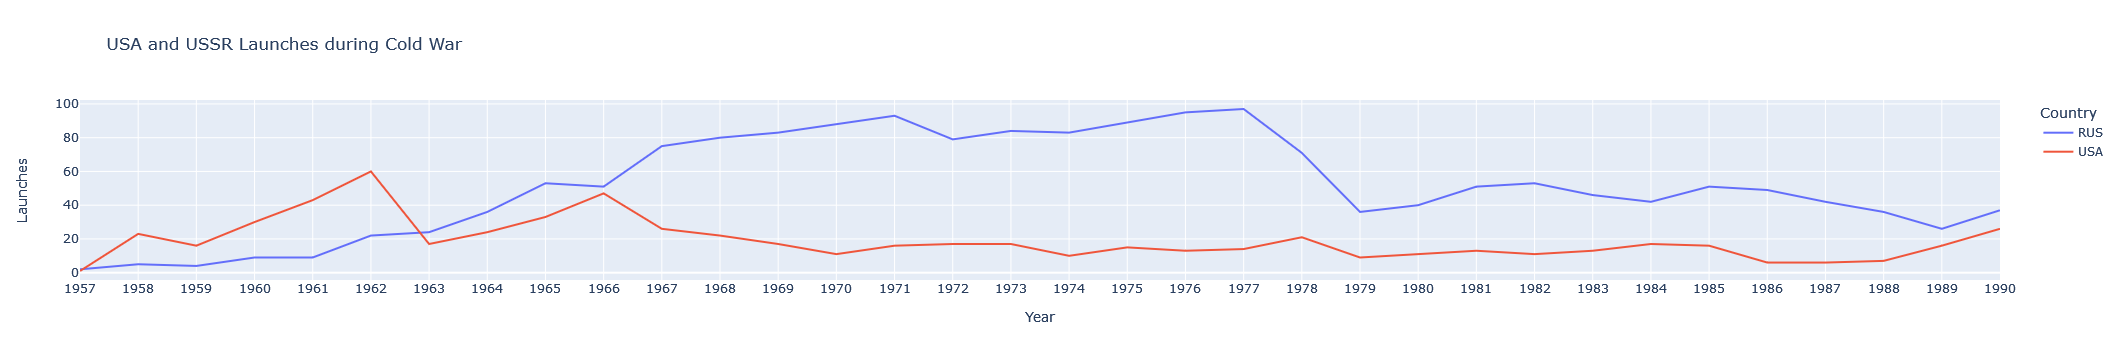

In [305]:
# use the prior years sorted dataframe since it is already setup

us_soviet_line = px.line(years_sorted,
                         x='Year',
                         y = 'Launches',
                         color = 'ISO',
                         title = 'USA and USSR Launches during Cold War')

# set x axis to increment every 5 years
us_soviet_line.update_xaxes(dtick = 1)
                        
us_soviet_line.update_layout(yaxis_title = 'Launches',
                            legend_title_text = 'Country')
    

## Chart the Total Number of Mission Failures Year on Year.

In [306]:
# first filter out dataframe to where no successes are shown, this is more straightforward since there are up to 3 types of failures
failures_df = df_data[df_data['Mission_Status'] != 'Success']

# then by group by year only, as a result all failures get grouped together since this is what we want for the graph
failures_yoy = failures_df.groupby(['Year'], as_index = False).size()



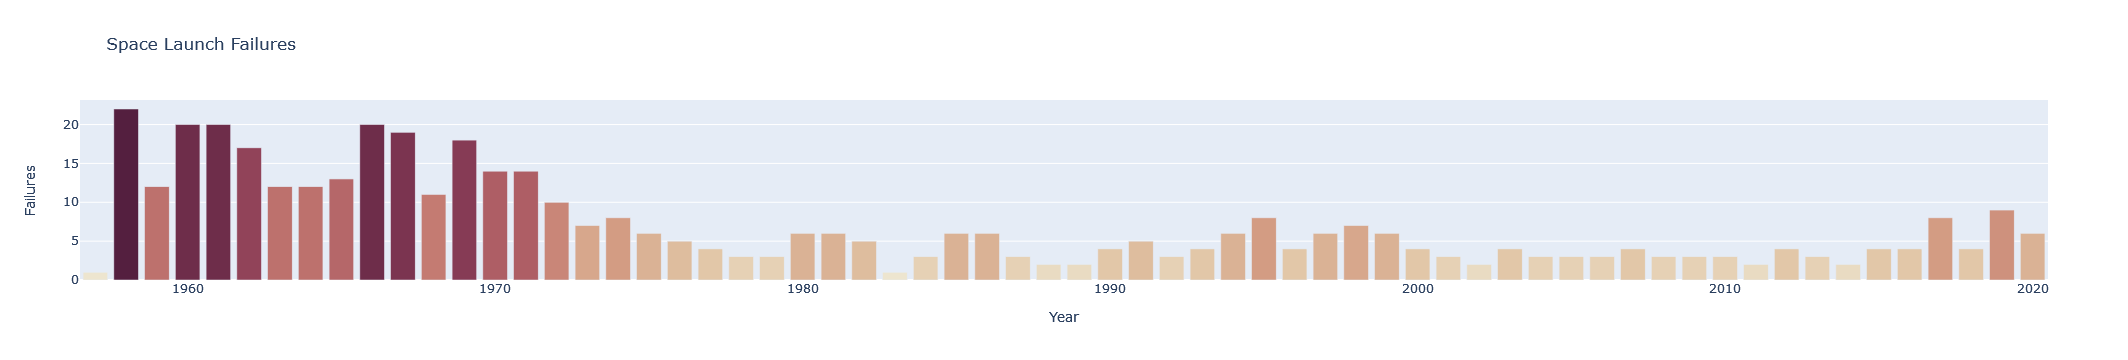

In [307]:
failures_line = px.bar(failures_yoy,
                        x='Year',
                        y='size',
                        title = 'Space Launch Failures',
                      color_continuous_scale = 'brwnyl',
                      color = 'size')

failures_line.update_layout(yaxis_title = 'Failures', coloraxis_showscale = False)


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [283]:
# find total launches

total_launches = df_data.groupby(['Year']).size().reset_index(name= 'Total_Launches')

#filter out to only include failures

In [308]:
# add total launches column
failures_yoy_pct = failures_yoy
failures_yoy_pct['total_launches'] = total_launches['Total_Launches']

# calculate failure pct
failures_yoy_pct['fail_pct'] = (failures_yoy_pct['size']/failures_yoy_pct['total_launches'])*100


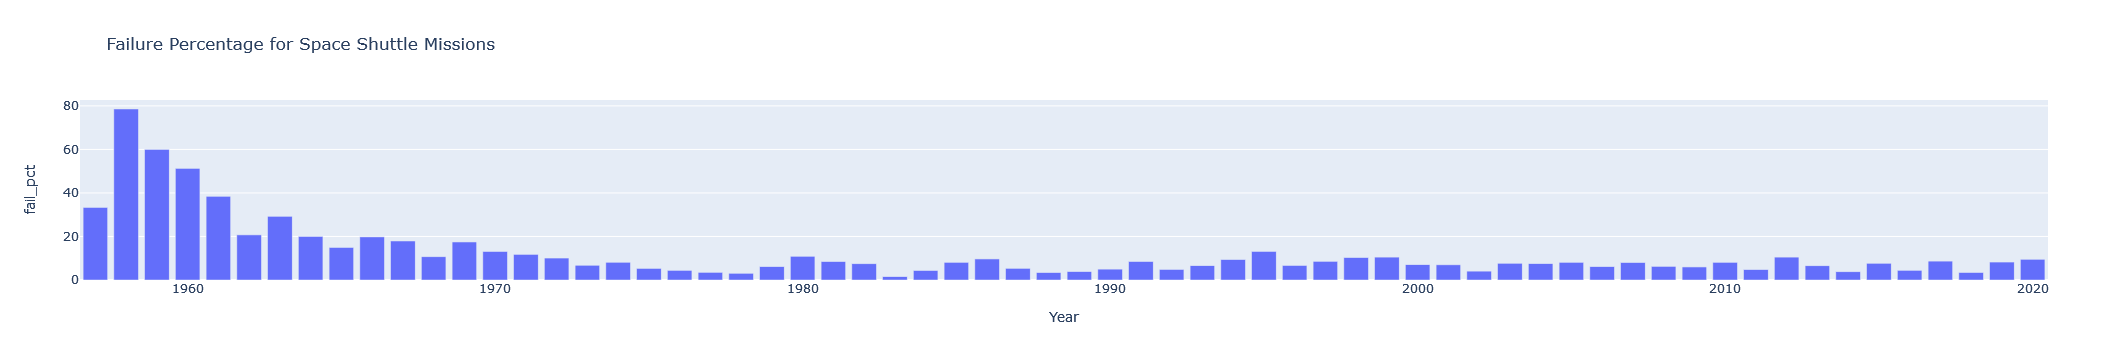

In [309]:
figure_pct = px.bar(failures_yoy_pct,
        x='Year',
        y='fail_pct',
        title = 'Failure Percentage for Space Shuttle Missions'
)

figure_pct.show()
        

<p>From the graph, failure rates have drastically decreased since 1957. After 1975 however, rates have more or less plateaued from 3 to 10 percent.</p>

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [310]:
# group by country
iso_yearly = df_data.groupby(['Year', 'ISO']).size().reset_index(name = 'Launches')

#replace KAZ with RUS since KAZ was part of the Soviet Union
iso_yearly['ISO'] = iso_yearly['ISO'].replace({'KAZ':'RUS'})



In [311]:
# sum number of launches - first group df by year, for each year access the Launches column to get total number of launches corresponding to each country. idxmax to return index of row.
#  .loc to return identity
lead_org_df = iso_yearly.loc[iso_yearly.groupby('Year')['Launches'].idxmax()]

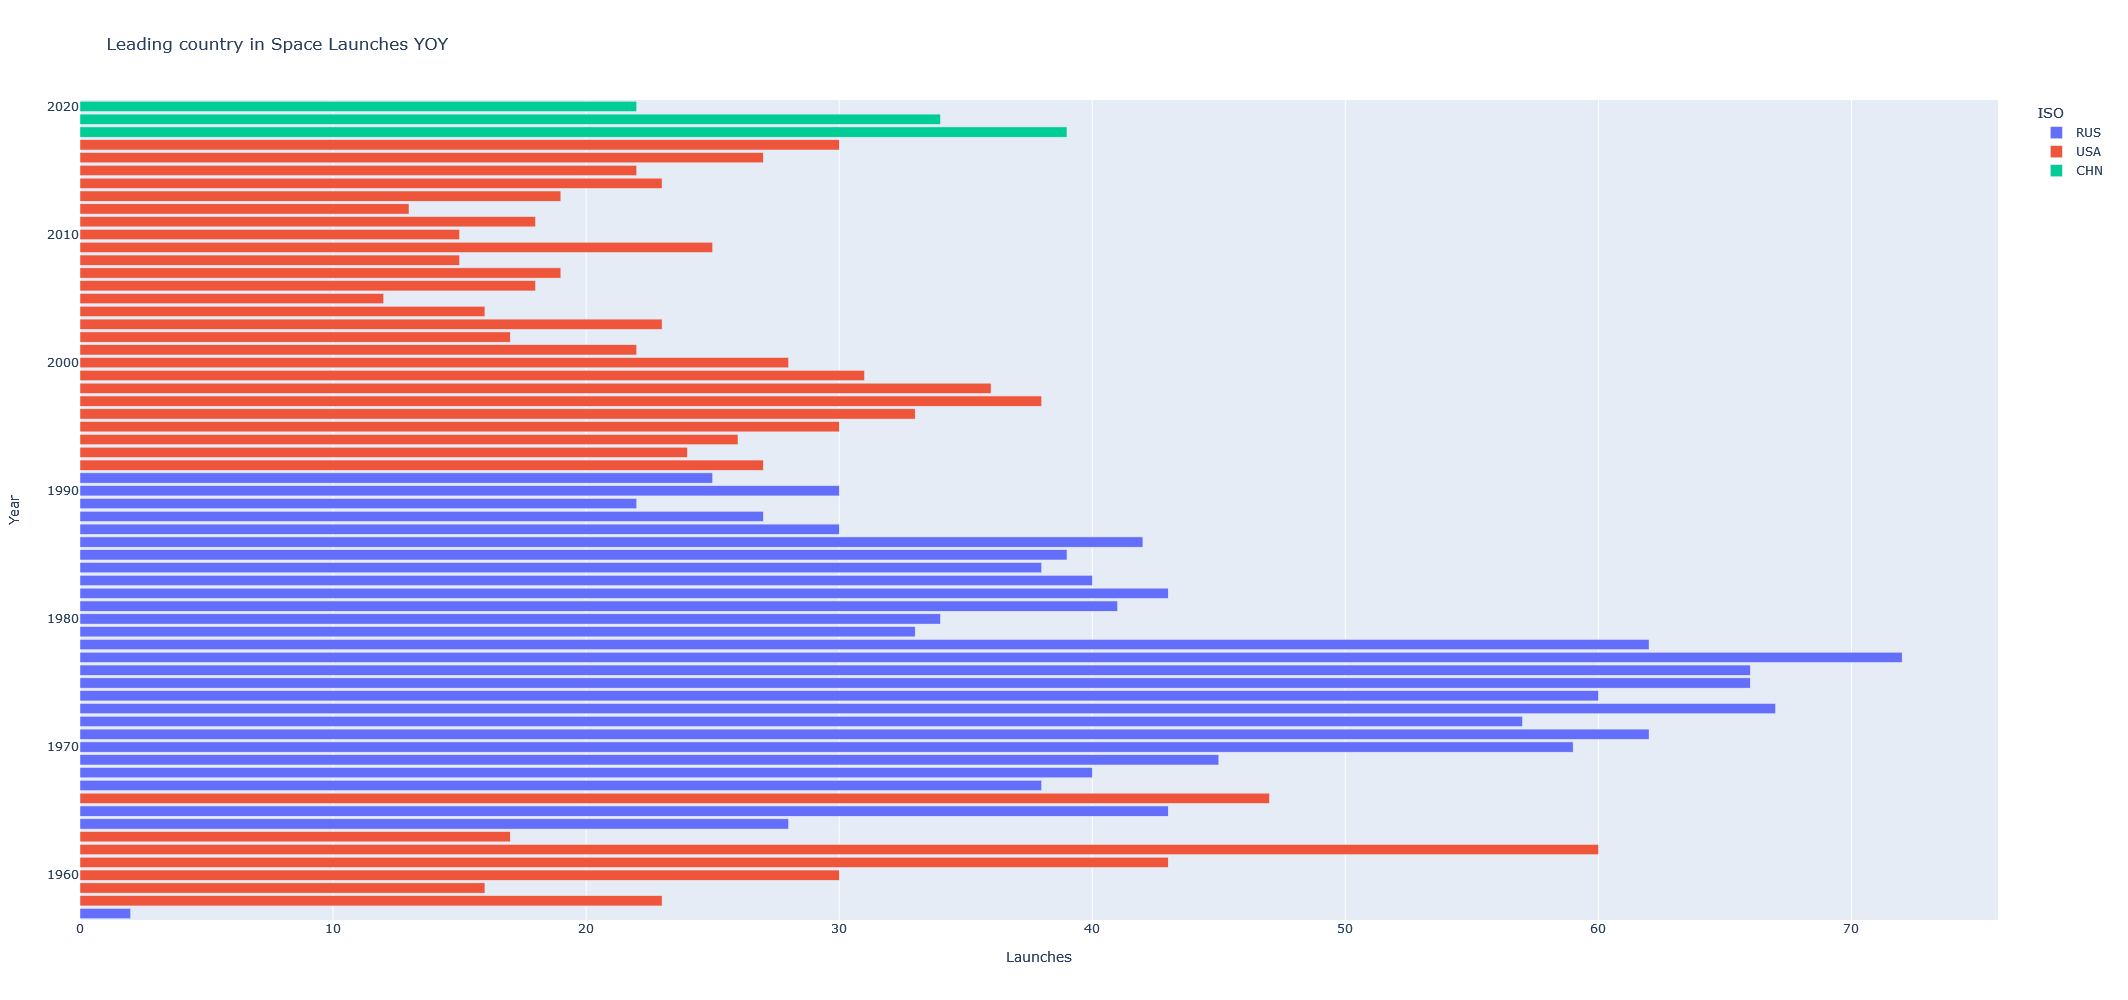

In [312]:
lead_org_bar = px.bar(lead_org_df,
                      x='Launches',
                      y='Year',
                      color = 'ISO',
                      title = 'Leading country in Space Launches YOY',
                     orientation = 'h',
                     width=1200, height=1000)
lead_org_bar.show()

<p>From the chart, the USA was dominant for the first 7 years of the space race, with the soviet union taking the lead from 1964 to it's Collapse in 1991. The US led from there on until 2018, where China began to overtake the US.</p>

<h3>Now only considering successful launches,</h3>

In [313]:
# let's filter df only to include successful launches
success_df = df_data[df_data['Mission_Status'] == 'Success'].sort_values(by='Year')

# group by country
country_success = success_df.groupby(['Year', 'ISO']).size().reset_index(name = 'Launches')

# map KAZ as Russia
country_success['ISO'] = country_success['ISO'].replace({'KAZ':'RUS'})



In [314]:
country_success = country_success.loc[country_success.groupby('Year')['Launches'].idxmax()]

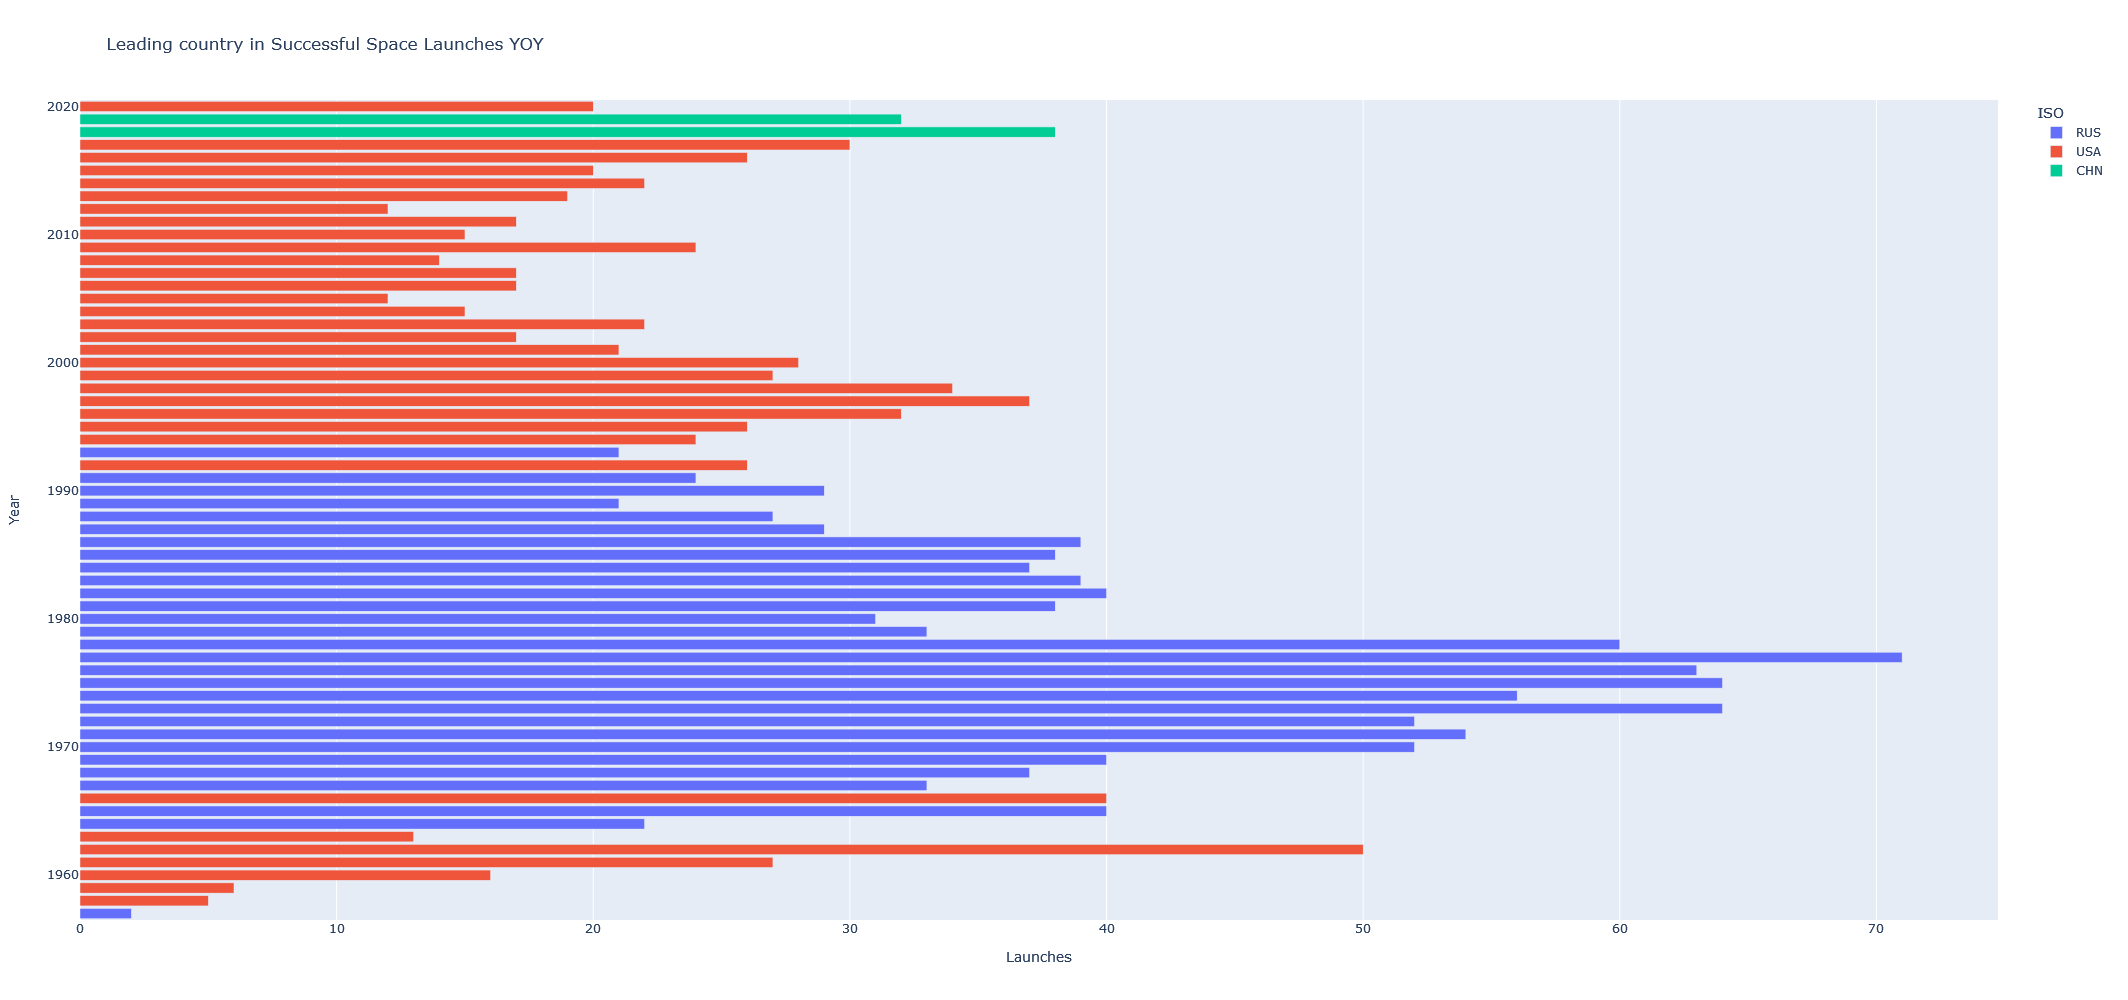

In [315]:
success_lead = px.bar(country_success,
                      x='Launches',
                      y='Year',
                      color = 'ISO',
                      title = 'Leading country in Successful Space Launches YOY',
                     orientation = 'h',
                     width=1200, height=1000)
success_lead.show()

<p>The trend is nearly similar, however China does lose out to the US in 2020 once failures are accounted for. In 1993 Russia beats the US once failures are accounted for.</p>

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [317]:
# here we'll use the launches_sorted df since it already is neatly sorted


In [318]:
# now we find winner per year
winning_org = launches_sorted.loc[launches_sorted.groupby('Date')['Launches'].idxmax()]
winning_org.tail(20)

,Date,Organisation,Launches
235,2001,Arianespace,8
240,2002,Arianespace,12
246,2003,Boeing,9
251,2004,Boeing,8
254,2005,Arianespace,5
260,2006,Boeing,8
268,2007,ULA,13
271,2008,CASC,9
277,2009,ULA,16
281,2010,ULA,8


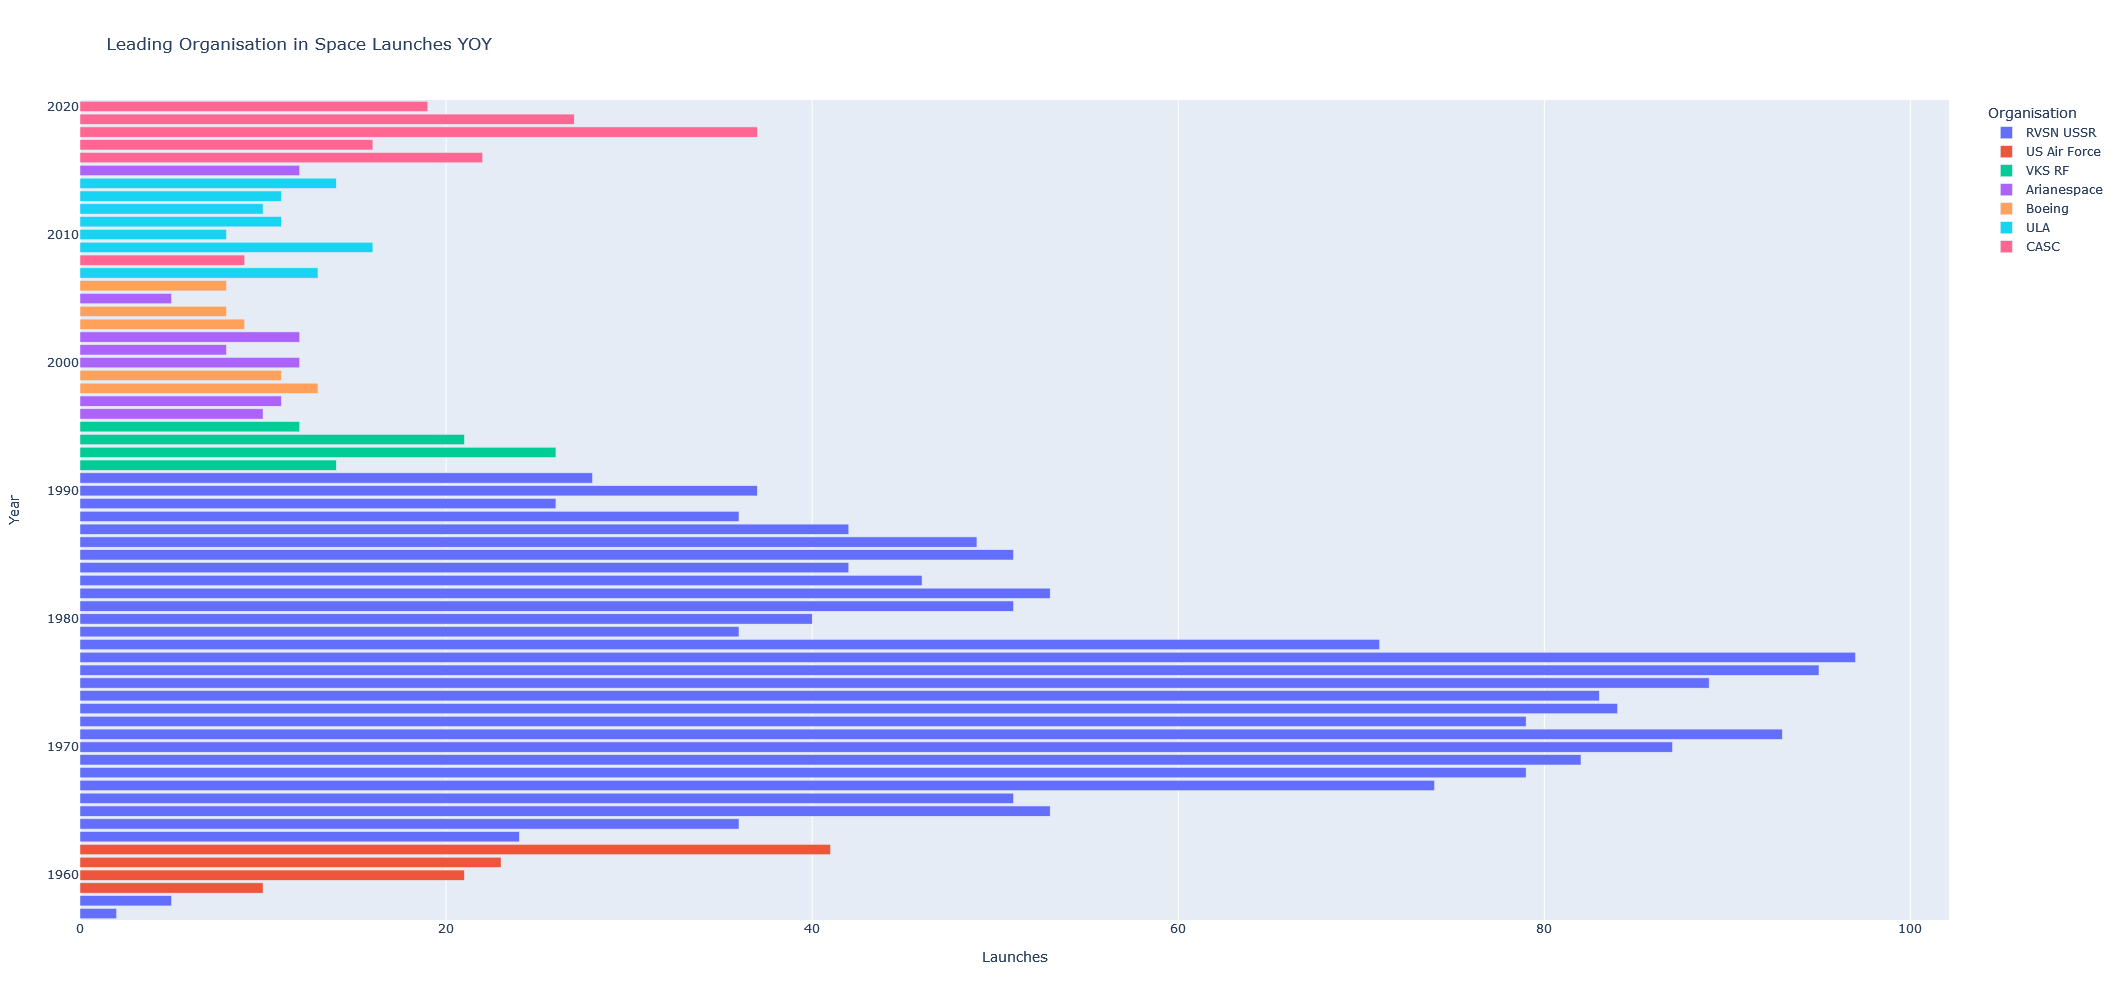

In [319]:
leading_org = px.bar(winning_org,
                      x='Launches',
                      y='Date',
                      color = 'Organisation',
                      title = 'Leading Organisation in Space Launches YOY',
                     orientation = 'h',
                     width=1200, height=1000)
leading_org.update_layout(yaxis_title = 'Year')
leading_org.show()

<p>The USSR was the dominant organisation in the 70's and 80's. From 2016 to 2020, the CASC lead in launches.</p>